# Predicting Health Outcomes of Horses with Machine Learning

### Context

Welcome to the **Scaler Health Analytics** team! Our objective is to leverage advanced analytics to predict health outcomes in horses, enabling veterinarians to make more informed decisions that can improve treatment strategies and overall horse health management. Utilizing machine learning techniques, particularly classification algorithms, you will analyze clinical data from horses to predict various health outcomes.

### Dataset Description

You have been provided with a comprehensive dataset containing clinical records of horses treated in a veterinary hospital. The data encapsulates a variety of clinical attributes that offer insights into the general health and medical condition of each horse. Each record in the dataset is described by the following features:

### Clinical Attributes:
- **id:** Unique identifier for each horse.
- **surgery:** Whether the horse had surgery (Yes/No).
- **age:** Age of the horse.
- **hospital_number:** Unique number assigned to the horse at the hospital.
- **rectal_temp:** Rectal temperature of the horse.
- **pulse:** Pulse rate in beats per minute.
- **respiratory_rate:** Respiratory rate in breaths per minute.
- **temp_of_extremities:** Temperature of extremities (a possible indicator of shock).
- **peripheral_pulse:** Quality of the peripheral pulse.
- **mucous_membrane:** Color of the mucous membranes, which can indicate blood circulation quality.
- **capillary_refill_time:** Time taken for color to return to mucous membrane after pressure is applied.
- **pain:** Horse's pain level (graded).
- **peristalsis:** Intestinal activity observed.
- **abdominal_distention:** Any distention of the abdomen.
- **nasogastric_tube:** Whether a nasogastric tube has been placed.
- **nasogastric_reflux:** Any nasogastric reflux noted.
- **nasogastric_reflux_ph:** pH of the nasogastric reflux.
- **rectal_exam_feces:** Findings of the rectal examination of feces.
- **abdomen:** Detailed examination findings of the abdomen.
- **packed_cell_volume:** Packed cell volume, indicating hydration status and blood loss.
- **total_protein:** Total protein levels in blood.
- **abdomo_appearance:** Appearance of abdominal fluid.
- **abdomo_protein:** Protein level in abdominal fluid.
- **surgical_lesion:** Presence of surgical lesions.
- **lesion_1, lesion_2, lesion_3:** Type and location of lesions identified.
- **cp_data:** Clinical pathology data.
- **outcome:** Health outcome of the horse (e.g., recovered, euthanized, died).

Your task is to use machine learning models to predict the 'outcome' for each horse and identify key predictors of health outcomes. This project will contribute significantly to improving the predictive models used in veterinary practices.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway, ttest_ind, kruskal
from scipy.stats import chi2_contingency
import scipy.stats as stats
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report



In [2]:

df = pd.read_csv("./../data/health_outcome_dataset.csv")
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

In [4]:
df.describe(include='object').T.sort_values('unique', ascending=False)

,count,unique,top,freq
mucous_membrane,1235,7,pale_pink,284
pain,1235,7,depressed,429
abdomen,1235,6,distend_small,482
peristalsis,1235,6,hypomotile,664
rectal_exam_feces,1235,6,absent,493
abdominal_distention,1235,5,moderate,543
temp_of_extremities,1235,5,cool,700
peripheral_pulse,1235,5,reduced,724
nasogastric_reflux,1235,5,more_1_liter,604
capillary_refill_time,1235,4,less_3_sec,834


In [5]:
df.isna().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [6]:
df2 = df[['pulse',  'outcome']]

In [7]:
df.groupby('outcome').agg('mean')['pulse']

C:\Users\Upendra\AppData\Local\Temp\ipykernel_3408\3158197781.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('outcome').agg('mean')['pulse']


outcome
died          90.207317
euthanized    86.573705
lived         68.918118
Name: pulse, dtype: float64

<Axes: xlabel='outcome', ylabel='pulse'>

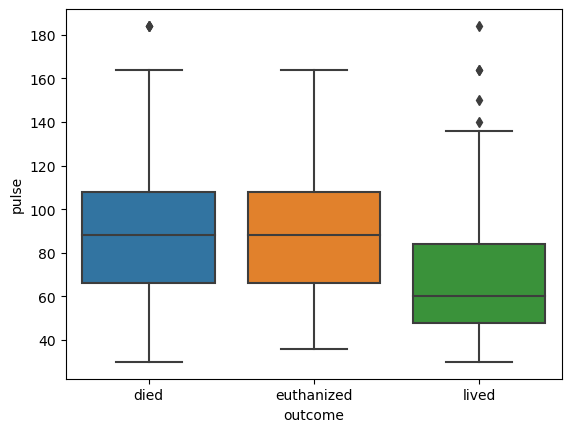

In [8]:
sns.boxplot(x='outcome', y='pulse',data=df)

In [9]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

### Q2. Rectal Temperature Correlation

In [10]:
df.rectal_temp

def categorize_temp(rectal_temp):
    tempCat = ""
    if (rectal_temp < 37.5): tempCat = "hypothermia"
    elif ((rectal_temp >= 37.5) & (rectal_temp < 38.5 )): tempCat = "normal"
    else : tempCat = "fever"
    return tempCat
        
df['temp_category'] = df.rectal_temp.apply(lambda x : categorize_temp(x) )

In [11]:
df['temp_category'].value_counts()

normal         670
fever          393
hypothermia    172
Name: temp_category, dtype: int64

<Axes: xlabel='temp_category,outcome'>

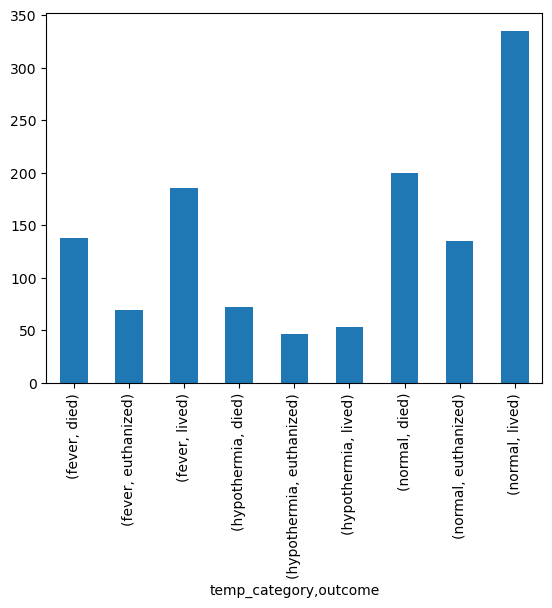

In [12]:
df.groupby(['temp_category', 'outcome'])['outcome'].count().plot(kind='bar')

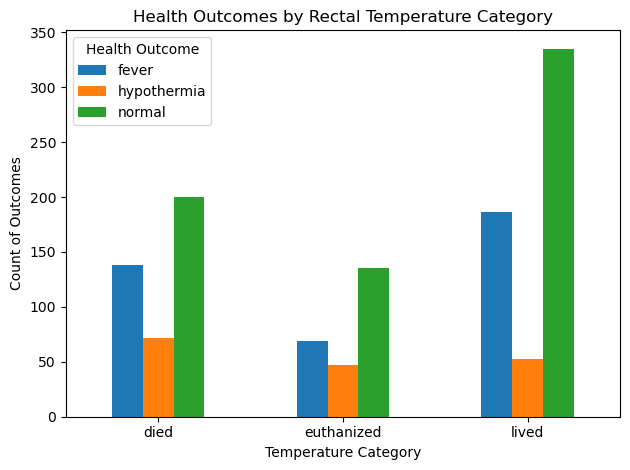

In [13]:
df.pivot_table(index='outcome', columns='temp_category', aggfunc ='size').plot(kind='bar')
plt.title('Health Outcomes by Rectal Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Count of Outcomes')
plt.xticks(rotation=0)
plt.legend(title='Health Outcome')
plt.tight_layout()  # Adjust layout to not cut off label

<Axes: xlabel='temp_category'>

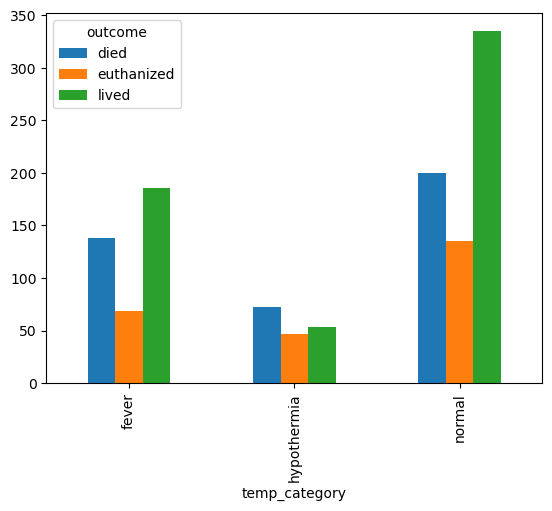

In [14]:
df.pivot_table(index='temp_category', columns='outcome', aggfunc ='size').plot(kind='bar')

###  Q3. Naive Bayes Assumption and Its Impact

In [15]:
df[['surgery', 'age', 'pulse', 'mucous_membrane']]

,surgery,age,pulse,mucous_membrane
0,yes,adult,132.0,dark_cyanotic
1,yes,adult,88.0,pale_cyanotic
2,yes,adult,120.0,pale_pink
3,yes,adult,72.0,pale_pink
4,no,adult,52.0,normal_pink
...,...,...,...,...
1230,yes,adult,129.0,pale_pink
1231,yes,adult,60.0,pale_cyanotic
1232,yes,young,84.0,normal_pink
1233,yes,adult,70.0,bright_red


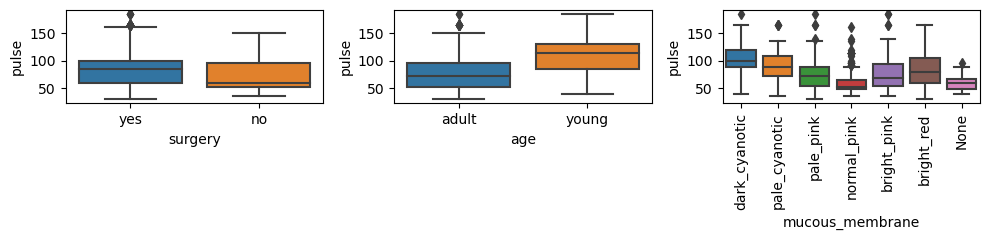

In [16]:
plt.figure(figsize=(10, 2.5), tight_layout = True)
plt.subplot(131)
sns.boxplot(x='surgery', y='pulse', data= df)

plt.subplot(132)
sns.boxplot(x='age', y='pulse', data= df)

plt.subplot(133)
sns.boxplot(x='mucous_membrane', y='pulse', data= df)
plt.xticks(rotation=  90)

plt.show()

### Q4. Analyzing Pain and Euthanasia Decisions

In [17]:
P_SeverePain = 0.20
P_Euthanized = 0.25
P_SeverePain_given_Euthanized = 0.50

P_Euthanized_given_SeverePain = (P_SeverePain_given_Euthanized * P_Euthanized ) / P_SeverePain
P_Euthanized_given_SeverePain

0.625

### Q5. Feature Significance with Chi-square Test

In [18]:
def chisqare_test(data, predictor, target):

    # Create contingency table
    contingency_table = pd.crosstab(data[predictor], data[target])

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    H0 = f"(H0): There is no association between [{predictor} and {target}]."
    H1 = f"(H1): There is an association between [{predictor}' and {target}]."
    print (H0)  
    print (H1)
    print('Chi-Square test statistic:', np.round(chi2, 2))
    print('p-value:', p)

    print("*"*50)
    print(predictor)
    
    if p < 0.05:
        print(f'Reject the H0. There is significant association between "{predictor} and {target}" variables as p_value {p} <  aplha = 0.05')
    else:
        print(f'Fail to Reject H0, There is no association between "{predictor} and {target}" variable as p_value {p} > aplha = 0.05')
    print("*"*50)
    
    print()
    
    return p
    


In [19]:
df.iloc[:, 15:]

,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome,temp_category
0,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died,normal
1,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized,normal
2,none,3.5,None,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived,normal
3,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived,hypothermia
4,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,more_1_liter,2.0,None,distend_large,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived,fever
1231,none,3.0,decreased,distend_small,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died,normal
1232,none,3.0,increased,firm,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived,normal
1233,more_1_liter,2.0,absent,distend_small,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived,normal


In [20]:
categorical = ['surgery', 'age', 'hospital_number', 'temp_of_extremities', 'peripheral_pulse', 
               'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 
              'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 
               'surgical_lesion', 'cp_data', 'temp_category'
               
              ]

target = 'outcome'

p_value = []
for catcol in categorical:
    p_value.append(chisqare_test(df, catcol, target))

(H0): There is no association between [surgery and outcome].
(H1): There is an association between [surgery' and outcome].
Chi-Square test statistic: 31.66
p-value: 1.3372037916999573e-07
**************************************************
surgery
Reject the H0. There is significant association between "surgery and outcome" variables as p_value 1.3372037916999573e-07 <  aplha = 0.05
**************************************************

(H0): There is no association between [age and outcome].
(H1): There is an association between [age' and outcome].
Chi-Square test statistic: 55.36
p-value: 9.515417931070396e-13
**************************************************
age
Reject the H0. There is significant association between "age and outcome" variables as p_value 9.515417931070396e-13 <  aplha = 0.05
**************************************************

(H0): There is no association between [hospital_number and outcome].
(H1): There is an association between [hospital_number' and outcome].
Chi-S

In [21]:
df3 = pd.DataFrame()
df3['features'] = categorical
df3['p_value'] = p_value

df3.sort_values('p_value', ascending=False)

,features,p_value
17,temp_category,1.180664e-04
11,nasogastric_reflux,1.786799e-07
0,surgery,1.337204e-07
10,nasogastric_tube,1.276694e-08
1,age,9.515418e-13
13,abdomen,6.848251e-14
16,cp_data,4.443146e-18
15,surgical_lesion,2.574669e-20
6,capillary_refill_time,2.516453e-22
8,peristalsis,1.371786e-23


In [22]:
df3.p_value < 0.05

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
Name: p_value, dtype: bool

### Q6. Data Preprocessing for Modelling


In [23]:
df = df.drop(columns=['id'])

In [24]:
numericaL_col = df.columns.difference(categorical)
numericaL_col = numericaL_col.difference([target])
df[numericaL_col]



,abdomo_protein,lesion_1,lesion_2,lesion_3,nasogastric_reflux_ph,packed_cell_volume,pulse,rectal_temp,respiratory_rate,total_protein
0,3.4,2209,0,0,6.5,57.0,132.0,38.1,24.0,8.5
1,2.0,2208,0,0,2.0,33.0,88.0,37.5,12.0,64.0
2,3.4,5124,0,0,3.5,37.0,120.0,38.3,28.0,6.4
3,3.9,2208,0,0,2.0,53.0,72.0,37.1,30.0,7.0
4,2.6,0,0,0,7.0,47.0,52.0,38.0,48.0,7.3
...,...,...,...,...,...,...,...,...,...,...
1230,2.0,2206,0,0,2.0,57.0,129.0,38.5,48.0,66.0
1231,3.6,2209,0,0,3.0,35.0,60.0,37.5,50.0,6.4
1232,7.0,400,0,0,3.0,40.0,84.0,37.5,40.0,5.9
1233,2.0,2209,0,0,2.0,58.0,70.0,38.1,16.0,74.0


In [25]:

std = StandardScaler()
df[numericaL_col] = pd.DataFrame(std.fit_transform(df[numericaL_col]), columns=numericaL_col)

In [26]:
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome,temp_category
0,yes,adult,530001,-0.129621,1.801773,-0.368142,cool,reduced,dark_cyanotic,more_3_sec,...,-0.483319,serosanguious,0.068659,yes,-0.298737,-0.075465,-0.040275,no,died,normal
1,yes,adult,533836,-0.890705,0.289582,-1.097830,cool,normal,pale_cyanotic,more_3_sec,...,1.598010,serosanguious,-0.812647,yes,-0.298921,-0.075465,-0.040275,no,euthanized,normal
2,yes,adult,529812,0.124074,1.389357,-0.124913,cool,reduced,pale_pink,less_3_sec,...,-0.562072,serosanguious,0.068659,yes,0.237648,-0.075465,-0.040275,no,lived,normal
3,yes,adult,5262541,-1.398095,-0.260306,-0.003299,cold,reduced,pale_pink,more_3_sec,...,-0.539571,cloudy,0.383411,yes,-0.298921,-0.075465,-0.040275,yes,lived,hypothermia
4,no,adult,5299629,-0.256468,-0.947666,1.091232,normal,normal,normal_pink,less_3_sec,...,-0.528321,cloudy,-0.434944,no,-0.705212,-0.075465,-0.040275,yes,lived,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,535246,0.377769,1.698669,1.091232,cool,reduced,pale_pink,more_3_sec,...,1.673013,serosanguious,-0.812647,yes,-0.299289,-0.075465,-0.040275,no,lived,fever
1231,yes,adult,528570,-0.890705,-0.672722,1.212846,cool,reduced,pale_cyanotic,less_3_sec,...,-0.562072,serosanguious,0.194560,yes,-0.298737,-0.075465,-0.040275,yes,died,normal
1232,yes,young,529685,-0.890705,0.152110,0.604774,normal,reduced,normal_pink,less_3_sec,...,-0.580823,cloudy,2.334874,yes,-0.631608,-0.075465,-0.040275,yes,lived,normal
1233,yes,adult,534784,-0.129621,-0.329042,-0.854601,normal,reduced,bright_red,less_3_sec,...,1.973025,cloudy,-0.812647,yes,-0.298737,-0.075465,-0.040275,no,lived,normal


In [27]:


enc = OrdinalEncoder()
df[categorical] = enc.fit_transform(df[categorical])

In [28]:
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome,temp_category
0,1.0,0.0,109.0,-0.129621,1.801773,-0.368142,2.0,4.0,3.0,3.0,...,-0.483319,3.0,0.068659,1.0,-0.298737,-0.075465,-0.040275,0.0,died,2.0
1,1.0,0.0,153.0,-0.890705,0.289582,-1.097830,2.0,3.0,5.0,3.0,...,1.598010,3.0,-0.812647,1.0,-0.298921,-0.075465,-0.040275,0.0,euthanized,2.0
2,1.0,0.0,101.0,0.124074,1.389357,-0.124913,2.0,4.0,6.0,2.0,...,-0.562072,3.0,0.068659,1.0,0.237648,-0.075465,-0.040275,0.0,lived,2.0
3,1.0,0.0,226.0,-1.398095,-0.260306,-0.003299,1.0,4.0,6.0,3.0,...,-0.539571,2.0,0.383411,1.0,-0.298921,-0.075465,-0.040275,1.0,lived,1.0
4,0.0,0.0,252.0,-0.256468,-0.947666,1.091232,3.0,3.0,4.0,2.0,...,-0.528321,2.0,-0.434944,0.0,-0.705212,-0.075465,-0.040275,1.0,lived,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1.0,0.0,218.0,0.377769,1.698669,1.091232,2.0,4.0,6.0,3.0,...,1.673013,3.0,-0.812647,1.0,-0.299289,-0.075465,-0.040275,0.0,lived,0.0
1231,1.0,0.0,45.0,-0.890705,-0.672722,1.212846,2.0,4.0,5.0,2.0,...,-0.562072,3.0,0.194560,1.0,-0.298737,-0.075465,-0.040275,1.0,died,2.0
1232,1.0,1.0,93.0,-0.890705,0.152110,0.604774,3.0,4.0,4.0,2.0,...,-0.580823,2.0,2.334874,1.0,-0.631608,-0.075465,-0.040275,1.0,lived,2.0
1233,1.0,0.0,191.0,-0.129621,-0.329042,-0.854601,3.0,4.0,2.0,2.0,...,1.973025,2.0,-0.812647,1.0,-0.298737,-0.075465,-0.040275,0.0,lived,2.0


Bernoulli Naive Bayes Classification Report:
              precision    recall  f1-score   support

        Died       0.65      0.74      0.69        89
  Euthanized       0.57      0.69      0.62        42
       Lived       0.74      0.60      0.66       116

    accuracy                           0.67       247
   macro avg       0.65      0.68      0.66       247
weighted avg       0.68      0.67      0.67       247

['died' 'euthanized' 'lived']
[[66  4 19]
 [ 7 29  6]
 [28 18 70]]


<Axes: >

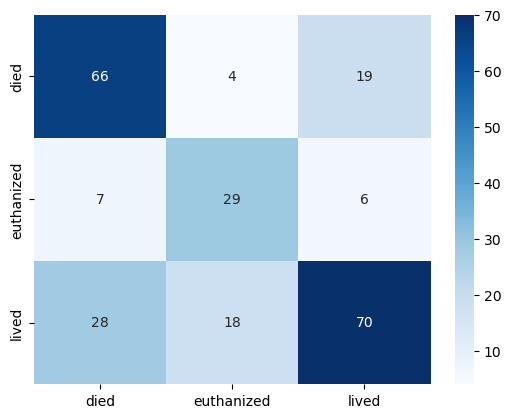

In [29]:



X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Bernoulli Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Died', 'Euthanized', 'Lived']))

print(clf.classes_)

cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',  xticklabels=clf.classes_, yticklabels=clf.classes_)

Bernoulli Naive Bayes Classification Report:
              precision    recall  f1-score   support

        Died       0.65      0.74      0.69        89
  Euthanized       0.57      0.69      0.62        42
       Lived       0.74      0.60      0.66       116

    accuracy                           0.67       247
   macro avg       0.65      0.68      0.66       247
weighted avg       0.68      0.67      0.67       247



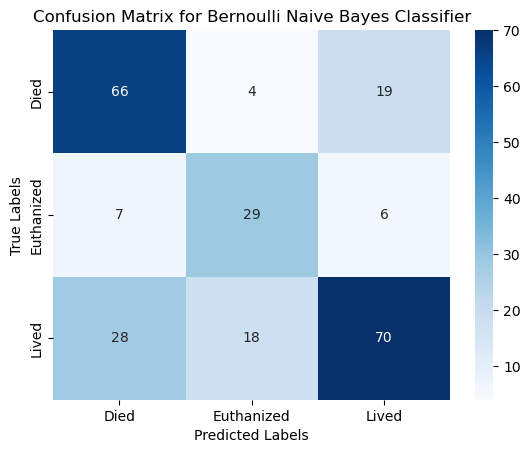

In [31]:
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt

# Train Bernoulli Naive Bayes classifier
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
y_pred_ber = bernoulli_nb.predict(X_test)

print("Bernoulli Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_ber, target_names=['Died', 'Euthanized', 'Lived']))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_ber)
categories = ['Died', 'Euthanized', 'Lived']

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Bernoulli Naive Bayes Classifier')
plt.show()


In [35]:
df.mucous_membrane

0       3.0
1       5.0
2       6.0
3       6.0
4       4.0
       ... 
1230    6.0
1231    5.0
1232    4.0
1233    2.0
1234    6.0
Name: mucous_membrane, Length: 1235, dtype: float64

In [34]:
df3 = df[['mucous_membrane', 'outcome']]

<Axes: xlabel='mucous_membrane', ylabel='count'>

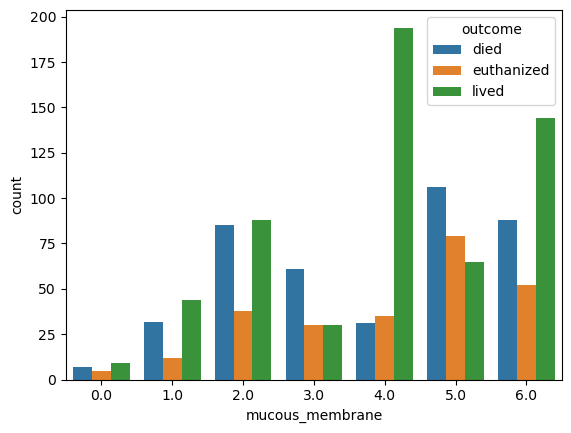

In [39]:
sns.countplot(x= 'mucous_membrane', data=df, hue='outcome')